# [Analityk.edu.pl](https://analityk.edu.pl)

# Zbiór danych Titanic


Zbiór, jest dostępny do pobrania, pod adresem - http://analityk.edu.pl/wp-content/uploads/2020/02/titanic.csv

Zawiera on dane wszystkich pasażerów Titanica, z takimi infomracjami jak:

- survival - Survival (0 = No; 1 = Yes) ## czyli czy pasażer przeżył
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) ## clasa, którą podróżował
- name - Name ## imię, nazwisko
- sex - Sex ## płeć
- age - Age ## wiek
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard ## ilość dzieci
- ticket - Ticket Number ## numer biletu
- fare - Passenger Fare
- cabin - Cabin ## numer kajuty
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) ## nazwa portu w którym wsiadł na pokład
- boat - Lifeboat (if survived) ## numer łódki, która się ewakułował
- body - Body number (if did not survive and body was recovered) ## numer identyfikacyjny znalezionego ciała


## Użycie zbioru danych Titanic

Zbioru używa się, na ogół, w dwojaki sposób:
1. Aby nabrać wprawy użyciu technik eksploracji danych. Analizując różnice w grupach osób które przeżyły i które zgineły, często za pomocą wykresów. Ma to na celu nabranie wprawy w posługiwaniu się między innymi, Pandas oraz Seaborn
2. Budując model predykcji, który po podaniu nowych parametrów pasażera, oblicza prawdopodobieństwo że pasażej przeżyje lub zginie. Ma to na celu, nabranie wprawy w procesie Data Mining, w ramach którego budujemy modele oparte o przykładowo drzewa decyzyjne lub regresję logistyczną. 

My skupimy się na poruszeniu punktu 1 oraz zapoznaniu sie ze zbiorem danych. Punkt 2, omówimy przy innej okazji.

## Import bibliotek

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import danych oraz czyszczenie

In [48]:
df = pd.read_csv("http://analityk.edu.pl/wp-content/uploads/2020/02/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


usuńmy kolumny, które nas na chwilę obecną, nie interesują

In [49]:
df = df.drop(['sibsp','ticket','fare','boat','body','cabin'], axis=1)
df.head()

,pclass,survived,name,sex,age,parch,embarked,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,2,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,2,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,2,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,2,S,"Montreal, PQ / Chesterville, ON"


Sprawdźmy czy w zbiorze danych, znajdują się zduplikowane wiersze

In [50]:
df[df.duplicated()==True]

,pclass,survived,name,sex,age,parch,embarked,home_dest


Sprawdźmy jak wygląda sprawa brakujących danych

In [51]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
parch          0
embarked       2
home_dest    564
dtype: int64

Widzimy, że mamy braki w danych odnośnie wieku, portu docelowego, oraz małe braku odnośnie portu, w którym osoba wsiadła na pokład. Będziemy musieli wziąść to pod uwagę w nasze analizie. W szczególności w przypadku, tworzenia wykresów w Seaborn, które będa wymagać kompletne dane.

## Szybki przegląd danych w Python

### Ile osób przeżyło, a ile zgineło

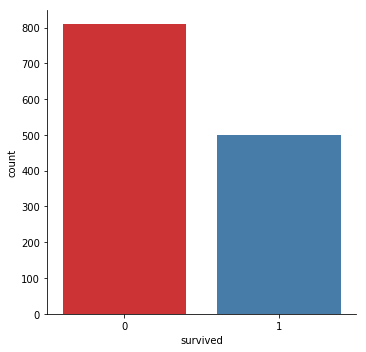

In [33]:
sns.set_palette("Set1")
sns.catplot(data=df,
           x='survived',
           kind='count')
plt.show()

## Czy klasa biletu miała wpływ na przeżycie?

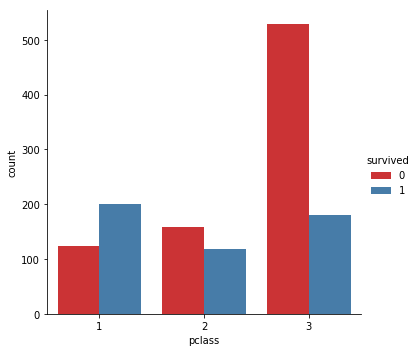

In [34]:
sns.catplot(data=df,
           x='pclass',
           kind = 'count',
           hue= 'survived')
plt.show()

## Czy wiek osoby, miał wpływ na przeżycie?

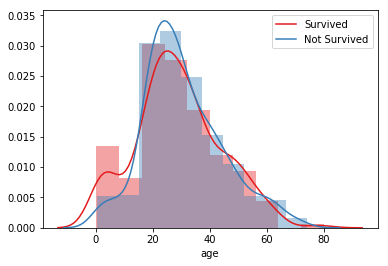

In [53]:
sns.distplot(df[df['age'].notnull() & (df['survived']==1)]['age'], 
             kde_kws={"label": "Survived"}, 
             bins=10)
sns.distplot(df[df['age'].notnull() & (df['survived']==0)]['age'], 
             kde_kws={"label": "Not Survived"}, 
             bins=10)
plt.show()

## Czy płeć osoby, miała wpływ na przeżycie?

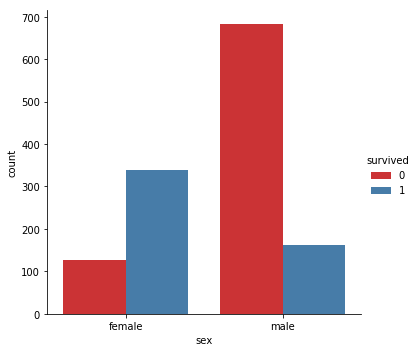

In [56]:
sns.catplot(data=df,
           x = 'sex',
           hue = 'survived',
           kind='count')
plt.show()

## Podsumowując

Ta szybka analiza jest jedynie początkiem zabawy ze zbiorem danych Titanic. Możemy badać czy przeżycie zależało od portu w którym osoba wsiadła na pokład, czy też jaki jest profil osoby która miała największe szanse na przeżycie.